# 使用cycler进行样式化
> 在本文的样例中，展示了自定义的循环属性设置的用途，它可以用于设置有多个线条的绘图的颜色和其他样式化属性。

> 更多`cycler`API完整的文档详见[这里](https://matplotlib.org/cycler/)。

下面的案例展示了两种不同的API：
1. 设置rc参数，对默认的属性循环进行修改。这会影响到所有后续的axes（但不会影响已经生成的axes）。
2. 对于单个axes单独设置属性循环。

In [26]:
from cycler import cycler
import numpy as np
import matplotlib.pyplot as plt

首先我们来生成一些样例数据，在本例中，他们是4个发生了一定位移的sin曲线。

In [27]:
x = np.linspace(0, 2*np.pi, 50)
offsets = np.linspace(0, 2*np.pi, 4, endpoint=False)
yy = np.transpose([np.sin(x+phi) for phi in offsets])

现在来看看`yy`的形状

In [28]:
print(yy.shape)

(50, 4)


所以`yy[:,i]`会得到第i个位移后的sin曲线。让我们通过`matplotlib.pyplot.rc()`设置默认的`prop_cycle`。我么可以通过加号（+）将颜色cycler和线型cycler结合起来。在下文中会讲解更多关于将不同类型的cycler结合起来的内容。

In [29]:
default_cycler = (cycler(color=['r', 'g', 'b', 'y']) +
                  cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=default_cycler)

现在让我们生成一张由两个axes组成的图，两个axes上下分布。在第一个axes上，我们使用默认的cycler进行绘图。在第二个axes上，我们使用`matplotlib.axes.Axes.set_prop_cycle()`对`prop_cycle`进行设置，它只会对当前的`matplotlib.axes.Axes`的`prop_cycle`进行设置。对于第二个axes，我们会使用另一个cycler,它是一个颜色cycler和线宽cycler的结合：

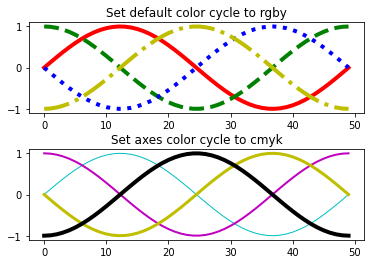

In [30]:
custom_cycler = (cycler(color=['c', 'm', 'y', 'k'])+
                cycler(lw=[1, 2, 3, 4]))

fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(yy)
ax0.set_title('Set default color cycle to rgby')
ax1.set_prop_cycle(custom_cycler)
ax1.plot(yy)
ax1.set_title('Set axes color cycle to cmyk')

# 在两个绘图之间增加一点空间
fig.subplots_adjust(hspace=0.4)
plt.show()

## 在`matplotlibrc`文件或样式文件中设置`prop_cycle`
还记得吗，你可以在`matplotlibrc`文件或样式文件（`style.mplstyle`）中的`axes.prop_cycle`下设置自定义的cycler：
```
axes.prop_cycle : cycler(color='bgrcmyk')
```

## 同时循环多个属性

你可以对cyclers进行相加处理:

In [31]:
from cycler import cycler
cc = (cycler(color=list('rgb')) +
      cycler(linestyle=['-', '--', '-.']))
for d in cc:
    print(d)

{'color': 'r', 'linestyle': '-'}
{'color': 'g', 'linestyle': '--'}
{'color': 'b', 'linestyle': '-.'}


也可以对cycler进行相乘处理：

In [32]:
from cycler import cycler
cc = (cycler(color=list('rgb')) *
      cycler(linestyle=['-', '--', '-.']))
for d in cc:
    print(d)

{'color': 'r', 'linestyle': '-'}
{'color': 'r', 'linestyle': '--'}
{'color': 'r', 'linestyle': '-.'}
{'color': 'g', 'linestyle': '-'}
{'color': 'g', 'linestyle': '--'}
{'color': 'g', 'linestyle': '-.'}
{'color': 'b', 'linestyle': '-'}
{'color': 'b', 'linestyle': '--'}
{'color': 'b', 'linestyle': '-.'}
